In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from math import sqrt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
pen = sns.load_dataset("penguins")

In [19]:
df = pen.copy()

In [22]:
df.count()

species              342
island               342
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [30]:
type_of_species = list(set(df["species"]))

In [31]:
type_of_species

['Chinstrap', 'Gentoo', 'Adelie']

In [ ]:
# No. of Chinstrap
len(df[df['species'] == type_of_species[0]])

68

In [ ]:
# No. of Gentoo
len(df[df['species'] == type_of_species[1]])

123

In [ ]:
# No. of Adelie
len(df[df['species'] == type_of_species[2]])

151

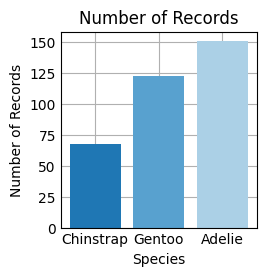

<Figure size 800x1000 with 0 Axes>

In [56]:
plt.xlabel("Species")
plt.ylabel("Number of Records")
plt.bar(type_of_species[0], height=len(df[df['species'] == type_of_species[0]]))
plt.bar(type_of_species[1], height=len(df[df['species'] == type_of_species[1]]))
plt.bar(type_of_species[2], height=len(df[df['species'] == type_of_species[2]]))
plt.title("Number of Records")
plt.figure(figsize=(8, 10))
plt.show()



In [50]:
type_of_species

['Chinstrap', 'Gentoo', 'Adelie']

In [3]:
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [51]:
#Adelie
data_Adelie = pen[pen['species'] == 'Adelie']['flipper_length_mm'].dropna()
n_Adelie = len(data_Adelie)
mean_Adelie = data_Adelie.mean()
std_err_Adelie = stats.sem(data_Adelie)
t_score_Adelie = stats.t.ppf(1 - 0.025, df=n_Adelie-1)
me_Adelie = t_score_Adelie * std_err_Adelie
print("The Margin of Error for Adelie is",me_Adelie)


The Margin of Error for Adelie is 1.051524450219586


In [52]:


#Chinstrap
data_Chinstrap = pen[pen['species'] == 'Chinstrap']['flipper_length_mm'].dropna()
n_Chinstrap = len(data_Chinstrap)
mean_Chinstrap = data_Chinstrap.mean()
std_err_Chinstrap = stats.sem(data_Chinstrap)
t_score_Chinstrap = stats.t.ppf(1 - 0.025, df=n_Chinstrap-1)
me_Chinstrap = t_score_Chinstrap * std_err_Chinstrap
print("The Margin of Error for Chinstrap is",me_Chinstrap)

The Margin of Error for Chinstrap is 1.726286179973198


In [53]:


#Gentoo
data_Gentoo = pen[pen['species'] == 'Gentoo']['flipper_length_mm'].dropna()
n_Gentoo = len(data_Gentoo)
mean_Gentoo = data_Gentoo.mean()
std_err_Gentoo = stats.sem(data_Gentoo)
t_score_Gentoo = stats.t.ppf(1 - 0.025, df=n_Gentoo-1)
me_Gentoo = t_score_Gentoo * std_err_Gentoo
print("The Margin of Error for Gentoo is",me_Gentoo)

The Margin of Error for Gentoo is 1.1575325805960366


In [54]:
# Confidence Intervals for each species
lower_bound_Adelie = round(mean_Adelie - me_Adelie, 3)
upper_bound_Adelie = round(mean_Adelie + me_Adelie, 3)

lower_bound_Chinstrap = round(mean_Chinstrap - me_Chinstrap, 3)
upper_bound_Chinstrap = round(mean_Chinstrap + me_Chinstrap, 3)

lower_bound_Gentoo = round(mean_Gentoo - me_Gentoo, 3)
upper_bound_Gentoo = round(mean_Gentoo + me_Gentoo, 3)

print("The CI for each:\nAdelie is between ({},{})\nChinstrap is between ({},{})\nGentoo is between ({},{})".format(lower_bound_Adelie, upper_bound_Adelie, lower_bound_Chinstrap, upper_bound_Chinstrap, lower_bound_Gentoo, upper_bound_Gentoo))

The CI for each:
Adelie is between (188.902,191.005)
Chinstrap is between (194.097,197.55)
Gentoo is between (216.029,218.345)


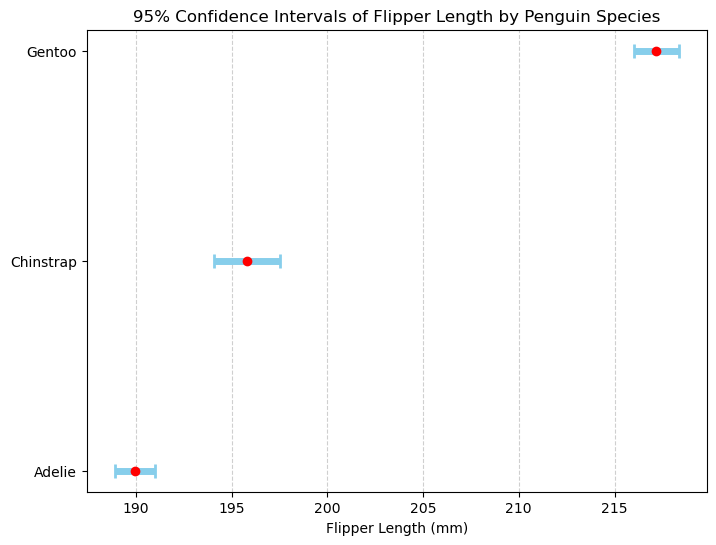

In [ ]:
# Plotting
species = type_of_species
means = [mean_Adelie, mean_Chinstrap, mean_Gentoo]
errors = [me_Adelie, me_Chinstrap, me_Gentoo]

plt.figure(figsize=(8, 6))
plt.errorbar(means, species, xerr=errors, fmt='o', color='red', ecolor='skyblue',elinewidth=5, capsize=5, capthick=2)
plt.title('95% Confidence Intervals of Flipper Length by Penguin Species')
plt.xlabel('Flipper Length (mm)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [8]:
Corr_Matrix = round(pen[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].corr(),2)
Corr_Matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


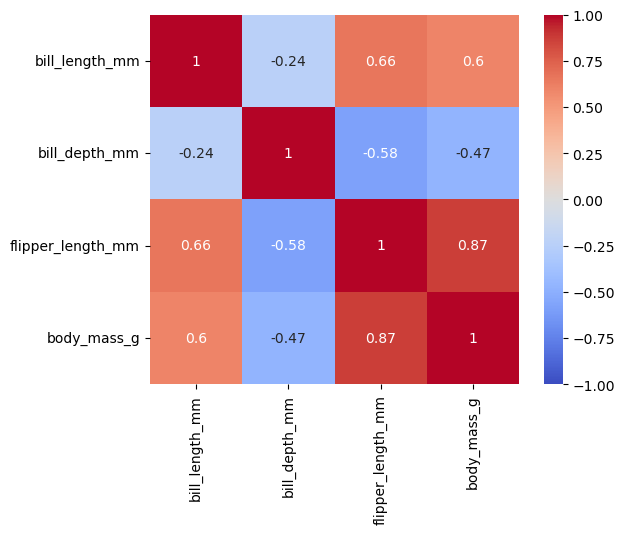

In [9]:
axis_corr = sns.heatmap(Corr_Matrix, vmin=-1, vmax=1, center=0, cmap="coolwarm", square=True, annot=True)
plt.show()

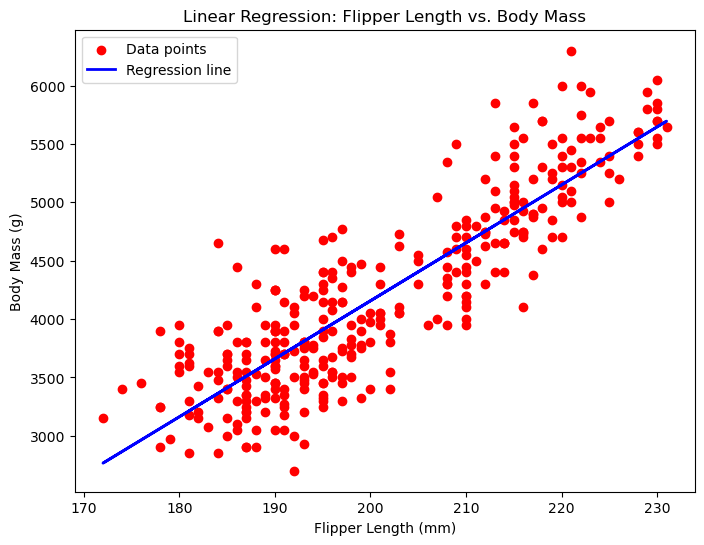

In [16]:
pen = pen.dropna(subset=['flipper_length_mm', 'body_mass_g'])

X = pen[['flipper_length_mm']]
y = pen['body_mass_g']

LR_model = LinearRegression()
LR_model.fit(X, y)

predictions = LR_model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(pen['flipper_length_mm'], pen['body_mass_g'], color='red', label='Data points')
plt.plot(pen['flipper_length_mm'], predictions, color='blue', linewidth=2, label='Regression line')
plt.title('Linear Regression: Flipper Length vs. Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()